## Libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import mlflow

## Data Loading and Exploration

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(20)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


In [4]:
train.shape

(165034, 14)

In [5]:
test.head(20)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
5,165039,15672704,Pearson,593,France,Female,22.0,9,0.00,2,0.0,0.0,51907.72
6,165040,15647838,Onyemere,682,Spain,Male,45.0,4,0.00,2,1.0,1.0,157878.67
7,165041,15775307,Hargreaves,539,Spain,Female,47.0,8,0.00,2,1.0,1.0,126784.29
8,165042,15653937,Hsueh,845,France,Female,47.0,3,111096.91,1,1.0,0.0,94978.10
9,165043,15752344,Teng,645,Spain,Male,30.0,5,0.00,2,0.0,1.0,149195.44


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [9]:
# checking for duplicates in the train set
idsUnique = len(set(train.id))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print(f"There are {idsDupli} duplicate IDs for {idsTotal} total entries")

There are 0 duplicate IDs for 165034 total entries


In [10]:
# checking for class imbalance - the class is called Exited
train['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [11]:
# seeing the imbalance ratio
train['Exited'].value_counts()/len(train)

Exited
0    0.788401
1    0.211599
Name: count, dtype: float64

In [12]:
# removing the id column for train and test set (keep for test set for submission)
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

In [13]:
# checking for missing values
train.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
# separating the target variable and merging train and test set for data cleaning
X = train.drop('Exited', axis=1)
y = train['Exited']

In [15]:
# merging with pd.concat
X = pd.concat([X, test], axis=0)

In [16]:
X.shape

(275057, 12)

## Performing EDA

In [17]:
# classifying the columns into categorical and numerical
cat_cols = [col for col in X.columns if X[col].dtype == 'object']
num_cols = [col for col in X.columns if X[col].dtype != 'object']

In [18]:
cat_cols

['Surname', 'Geography', 'Gender']

In [19]:
num_cols

['CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [20]:
# checking for unique values in surname and customer id
X['Surname'].nunique()

2889

In [21]:
X['CustomerId'].nunique()

28474

so we have repeated customers

In [22]:
# checking the unique geography
X['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [26]:
X.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83


In [24]:
X.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,2.750570e+05,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000
mean,1.569204e+07,656.484939,38.124415,5.010867,55420.296450,1.554002,0.753589,0.496755,112470.952558
std,7.151271e+04,80.188100,8.864927,2.806173,62805.933171,0.546178,0.430921,0.499990,50286.608747
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,1.563300e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74580.800000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117848.090000
75%,1.575688e+07,710.000000,42.000000,7.000000,120037.960000,2.000000,1.000000,1.000000,154871.130000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


In [27]:
# going back to the train set to make some analysis
train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [28]:
# Using groupby to see which country has the most exited customers
train.groupby('Geography')['Exited'].value_counts()

Geography  Exited
France     0         78643
           1         15572
Germany    0         21492
           1         13114
Spain      0         29978
           1          6235
Name: count, dtype: int64

<Axes: xlabel='Geography', ylabel='count'>

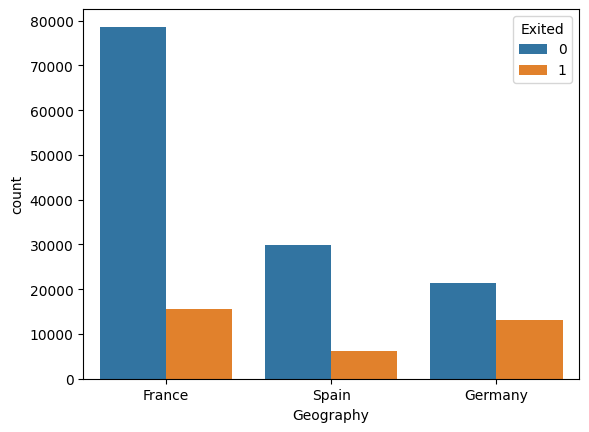

In [29]:
# creating a plot for this
sns.countplot(x='Geography', hue='Exited', data=train)

Majority of the customers in germany seems to be more excited averagely

Getting the respective long and lat 

In [38]:
# opening the long and lat file 
long_lat = pd.read_csv('world_country_and_usa_states_latitude_and_longitude_values.csv')
long_lat.head()

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California


In [39]:
# trimming the dataset
long_lat = long_lat[['country', 'latitude', 'longitude']]
long_lat.head()

,country,latitude,longitude
0,Andorra,42.546245,1.601554
1,United Arab Emirates,23.424076,53.847818
2,Afghanistan,33.939110,67.709953
3,Antigua and Barbuda,17.060816,-61.796428
4,Anguilla,18.220554,-63.068615


In [40]:
# getting the long and lat for the countries in the Geography column
train = pd.merge(train, long_lat, left_on='Geography', right_on='country', how='left')
train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country,latitude,longitude
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,France,46.227638,2.213749
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,France,46.227638,2.213749
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,France,46.227638,2.213749
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,France,46.227638,2.213749
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,Spain,40.463667,-3.749220


In [41]:
# now merging for the X set
X = pd.merge(X, long_lat, left_on='Geography', right_on='country', how='left')
X.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,country,latitude,longitude
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,France,46.227638,2.213749
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,France,46.227638,2.213749
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,France,46.227638,2.213749
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,France,46.227638,2.213749
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,Spain,40.463667,-3.749220


In [42]:
# dropping the country column in train and X set
train.drop('country', axis=1, inplace=True)
X.drop('country', axis=1, inplace=True)

In [43]:
X.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,latitude,longitude
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,46.227638,2.213749
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,46.227638,2.213749
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,46.227638,2.213749
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,46.227638,2.213749
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,40.463667,-3.749220


In [44]:
# classifying the columns into categorical and numerical
cat_cols = [col for col in X.columns if X[col].dtype == 'object']
num_cols = [col for col in X.columns if X[col].dtype != 'object']

In [45]:
print(cat_cols, num_cols)

['Surname', 'Geography', 'Gender'] ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'latitude', 'longitude']


In [46]:
# how about analyzing the CustemerId column? To derive possible features based on each customer
# using the groupby function to create extra features that correspond to each customer
# features like max and min credit score, max and min age, max and min tenure, max and min balance, max and min number of products, max and min estimated salary, then average credit score, average age, average tenure, average balance, average number of products, average estimated salary
# mean of the categorical columns, mode of the categorical columns, median of the categorical columns, standard deviation of the categorical columns, variance of the categorical columns, 
# number of countries, and possible relationshop between estimatedsalary, age, and so on
# using the X set for this
customers = X.groupby('CustomerId')

In [54]:
df = X.copy()

In [55]:
max_features = df.groupby('CustomerId').agg({
    'CreditScore': 'max',
    'Age': 'max',
    'Tenure': 'max',
    'Balance': 'max',
    'NumOfProducts': 'max',
    'EstimatedSalary': 'max'
}).rename(columns=lambda x: f'Max_{x}')

min_features = df.groupby('CustomerId').agg({
    'CreditScore': 'min',
    'Age': 'min',
    'Tenure': 'min',
    'Balance': 'min',
    'NumOfProducts': 'min',
    'EstimatedSalary': 'min'
}).rename(columns=lambda x: f'Min_{x}')


In [56]:
max_features

,Max_CreditScore,Max_Age,Max_Tenure,Max_Balance,Max_NumOfProducts,Max_EstimatedSalary
CustomerId,,,,,,
15565701,846,49.0,9,161993.89,2,129822.79
15565706,787,71.0,8,144962.74,2,160593.41
15565714,783,47.0,9,152390.25,2,194617.98
15565759,700,59.0,8,106589.73,1,185599.71
15565779,823,45.0,10,116084.32,2,188258.49
...,...,...,...,...,...,...
15815645,849,45.0,10,175575.95,2,198193.75
15815656,559,40.0,10,114668.89,1,199808.10
15815660,757,48.0,9,165272.13,3,168035.62


In [57]:
average_features = df.groupby('CustomerId').agg({
    'CreditScore': 'mean',
    'Age': 'mean',
    'Tenure': 'mean',
    'Balance': 'mean',
    'NumOfProducts': 'mean',
    'EstimatedSalary': 'mean'
}).rename(columns=lambda x: f'Average_{x}')


In [58]:
average_features

,Average_CreditScore,Average_Age,Average_Tenure,Average_Balance,Average_NumOfProducts,Average_EstimatedSalary
CustomerId,,,,,,
15565701,739.000000,38.500000,6.250000,107799.340000,1.250000,101307.162500
15565706,656.666667,40.833333,3.750000,39259.289167,1.416667,95160.421667
15565714,609.181818,39.545455,3.363636,61485.443636,1.727273,97808.718182
15565759,700.000000,59.000000,8.000000,106589.730000,1.000000,185599.710000
15565779,677.142857,37.571429,5.285714,38933.487143,1.428571,133794.762857
...,...,...,...,...,...,...
15815645,666.954545,36.318182,5.681818,112204.996818,1.454545,135990.263182
15815656,545.500000,38.250000,9.250000,103754.725000,1.000000,171007.325000
15815660,650.333333,37.666667,5.500000,75800.736667,1.333333,99291.148333


In [59]:
categorical_features = df.groupby('CustomerId').agg({
    'Surname': ['mean', 'mode', 'median', 'std', 'var'],
    'Geography': ['mean', 'mode', 'median', 'std', 'var'],
    'Gender': ['mean', 'mode', 'median', 'std', 'var']
}).rename(columns=lambda x: f'{x[0]}_{x[1]}')


TypeError: agg function failed [how->mean,dtype->object]